# Customer Churn Analysis of Infobel
    1) Descriptive analysis: 
      - shape, info, columns 
      - null values & non-unique values on the columns
      - descriptive analysis of numeric columns
      - quantiles of numeric columns (confidence level=0.05)
       
    2) Data visualization: 
      - pivot tables
      - correlation matrix & heatmap
      - histograms
      - statistics
      
    3) Predictive modeling
      - preprocessing
      - scaling
      - model-fitting
      - hypertuning
      
       (**randomstate = 4563 -> through the predictive part)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score,roc_curve, jaccard_score
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,recall_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

In [3]:
df=pd.read_csv("Infobel - Data.csv")
df.head()

,Customer ID,Churn Label,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Intl Active,Intl Plan,Extra International Charges,...,Senior,Group,Number of Customers in Group,Device Protection & Online Backup,Contract Type,Payment Method,Monthly Charge,Total Charges,Churn Category,Churn Reason
0,4444-BZPU,No,1,3,8.0,0.0,0.0,No,no,0.0,...,No,No,0,No,Month-to-Month,Direct Debit,10,10,NaN,NaN
1,5676-PTZX,No,33,179,431.3,0.0,0.0,No,no,0.0,...,No,No,0,Yes,One Year,Paper Check,21,703,NaN,NaN
2,8532-ZEKQ,No,44,82,217.6,0.0,0.0,No,yes,0.0,...,No,No,0,Yes,One Year,Direct Debit,23,1014,NaN,NaN
3,1314-SMPJ,No,10,47,111.6,60.0,71.0,Yes,yes,0.0,...,No,No,0,No,Month-to-Month,Paper Check,17,177,NaN,NaN
4,2956-TXCJ,No,62,184,621.2,310.0,694.4,Yes,yes,0.0,...,No,No,0,No,One Year,Direct Debit,28,1720,NaN,NaN


# Descriptive Analysis & some ETL

In [4]:
df.shape

(6687, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6687 entries, 0 to 6686
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        6687 non-null   object 
 1   Churn Label                        6687 non-null   object 
 2   Account Length (in months)         6687 non-null   int64  
 3   Local Calls                        6687 non-null   int64  
 4   Local Mins                         6687 non-null   float64
 5   Intl Calls                         6687 non-null   float64
 6   Intl Mins                          6687 non-null   float64
 7   Intl Active                        6687 non-null   object 
 8   Intl Plan                          6687 non-null   object 
 9   Extra International Charges        6687 non-null   float64
 10  Customer Service Calls             6687 non-null   int64  
 11  Avg Monthly GB Download            6687 non-null   int64

In [6]:
df.columns

Index(['Customer ID', 'Churn Label', 'Account Length (in months)',
       'Local Calls', 'Local Mins', 'Intl Calls', 'Intl Mins', 'Intl Active',
       'Intl Plan', 'Extra International Charges', 'Customer Service Calls',
       'Avg Monthly GB Download', 'Unlimited Data Plan', 'Extra Data Charges',
       'State', 'Phone Number', 'Gender', 'Age', 'Under 30', 'Senior', 'Group',
       'Number of Customers in Group', 'Device Protection & Online Backup',
       'Contract Type', 'Payment Method', 'Monthly Charge', 'Total Charges',
       'Churn Category', 'Churn Reason'],
      dtype='object')

In [7]:
df.isnull().any()

Customer ID                          False
Churn Label                          False
Account Length (in months)           False
Local Calls                          False
Local Mins                           False
Intl Calls                           False
Intl Mins                            False
Intl Active                          False
Intl Plan                            False
Extra International Charges          False
Customer Service Calls               False
Avg Monthly GB Download              False
Unlimited Data Plan                  False
Extra Data Charges                   False
State                                False
Phone Number                         False
Gender                               False
Age                                  False
Under 30                             False
Senior                               False
Group                                False
Number of Customers in Group         False
Device Protection & Online Backup    False
Contract Ty

In [8]:
df.isnull().sum()

Customer ID                             0
Churn Label                             0
Account Length (in months)              0
Local Calls                             0
Local Mins                              0
Intl Calls                              0
Intl Mins                               0
Intl Active                             0
Intl Plan                               0
Extra International Charges             0
Customer Service Calls                  0
Avg Monthly GB Download                 0
Unlimited Data Plan                     0
Extra Data Charges                      0
State                                   0
Phone Number                            0
Gender                                  0
Age                                     0
Under 30                                0
Senior                                  0
Group                                   0
Number of Customers in Group            0
Device Protection & Online Backup       0
Contract Type                     

In [9]:
6687-4918

1769

In [10]:
label_yes = df[df['Churn Label'] == 'Yes']
label_yes['Customer ID'].count()

1796

In [11]:
1796-1769

27

In [12]:
condition_no = df['Churn Label'] == 'No'
condition_yes = df['Churn Label'] == 'Yes'
df['Churn Reason'] = np.where(df['Churn Reason'].isnull()&condition_no,"Not Churned",df['Churn Reason'])
df['Churn Reason'] = np.where(df['Churn Reason'].isnull()&condition_yes,"Unspecified",df['Churn Reason'])
df['Churn Reason'].value_counts()

Not Churned                                  4891
Competitor made better offer                  303
Competitor had better devices                 297
Attitude of support person                    203
Don't know                                    123
Competitor offered more data                  110
Competitor offered higher download speeds      95
Attitude of service provider                   84
Price too high                                 74
Product dissatisfaction                        73
Network reliability                            69
Long distance charges                          61
Service dissatisfaction                        60
Moved                                          44
Extra data charges                             37
Limited range of services                      35
Poor expertise of online support               30
Lack of affordable download/upload speed       28
Unspecified                                    27
Lack of self-service on Website                26


In [13]:
df['Churn Category'] = np.where(df['Churn Category'].isnull()&condition_no,"Not Churned",df['Churn Category'])
df['Churn Category'] = np.where(df['Churn Category'].isnull()&condition_yes,"Unspecified",df['Churn Category'])
df['Churn Category'].value_counts()

Not Churned        4891
Competitor          805
Attitude            287
Dissatisfaction     286
Price               200
Other               191
Unspecified          27
Name: Churn Category, dtype: int64

In [14]:
df.nunique()

Customer ID                          6687
Churn Label                             2
Account Length (in months)             77
Local Calls                           521
Local Mins                           4222
Intl Calls                            335
Intl Mins                            1626
Intl Active                             2
Intl Plan                               2
Extra International Charges          1290
Customer Service Calls                  6
Avg Monthly GB Download                36
Unlimited Data Plan                     2
Extra Data Charges                     91
State                                  51
Phone Number                         6677
Gender                                  3
Age                                    67
Under 30                                2
Senior                                  2
Group                                   2
Number of Customers in Group            6
Device Protection & Online Backup       2
Contract Type                     

In [15]:
df.describe()

,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Extra International Charges,Customer Service Calls,Avg Monthly GB Download,Extra Data Charges,Age,Number of Customers in Group,Monthly Charge,Total Charges
count,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000
mean,32.337820,130.974129,322.752864,51.097524,130.070624,33.641783,0.915657,6.696276,3.374458,47.448632,0.837894,31.030357,1083.755645
std,24.595689,121.893966,288.619931,103.592369,243.527828,76.346828,1.411484,7.454339,12.565309,16.969893,1.700780,16.288147,1127.074863
min,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,5.000000,6.000000
25%,9.000000,31.000000,76.900000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,33.000000,0.000000,16.000000,181.000000
50%,29.000000,98.000000,250.500000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,47.000000,0.000000,31.000000,647.000000
75%,55.000000,199.000000,498.050000,52.000000,140.400000,16.400000,2.000000,9.000000,0.000000,60.000000,0.000000,43.000000,1732.500000
max,77.000000,918.000000,1234.200000,1120.000000,1372.500000,585.800000,5.000000,43.000000,99.000000,85.000000,6.000000,78.000000,5574.000000


In [16]:
quantiles = df.quantile([0.05,0.1,0.25, 0.5, 0.75,0.9,0.95])
print(quantiles)

      Account Length (in months)  Local Calls  Local Mins  Intl Calls  \
0.05                         1.0          4.0       11.00         0.0   
0.10                         2.0          7.0       16.00         0.0   
0.25                         9.0         31.0       76.90         0.0   
0.50                        29.0         98.0      250.50         0.0   
0.75                        55.0        199.0      498.05        52.0   
0.90                        69.0        313.0      767.68       204.0   
0.95                        71.0        373.0      911.74       276.0   

      Intl Mins  Extra International Charges  Customer Service Calls  \
0.05       0.00                         0.00                     0.0   
0.10       0.00                         0.00                     0.0   
0.25       0.00                         0.00                     0.0   
0.50       0.00                         0.00                     0.0   
0.75     140.40                        16.40           

C:\Users\Elif\AppData\Local\Temp\ipykernel_30464\3132322734.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  quantiles = df.quantile([0.05,0.1,0.25, 0.5, 0.75,0.9,0.95])


In [17]:
# filling the missing churn category and churn reason with "Not Churned" for the not churned customera
df['Churn Category'] = df['Churn Category'].fillna('Not Churned')
df['Churn Reason'] = df['Churn Reason'].fillna('Not Churned')

In [18]:
df['Gender'].value_counts()

Male                 3379
Female               3301
Prefer not to say       7
Name: Gender, dtype: int64

In [19]:
7/6687

0.0010468072379243307

In [20]:
# because there is only 7 rows, and the proportion to total population is 0.001,which is out of CL 
# 'Prefer not to say' rows will be removed in order to use the Gender column precisely
df= df[df['Gender']!='Prefer not to say']

In [21]:
# change the name of the column to use it easier
df.rename(columns={'Account Length (in months)': 'Tenure'}, inplace=True)

In [22]:
# also phone number is not related to the analysis so the drop this column
df = df.drop(columns='Phone Number')

In [23]:
not_active = df[(df['Intl Calls'] == 0)&(df['Local Calls'] == 0)&(df['Avg Monthly GB Download'] == 0)]
not_active

,Customer ID,Churn Label,Tenure,Local Calls,Local Mins,Intl Calls,Intl Mins,Intl Active,Intl Plan,Extra International Charges,...,Senior,Group,Number of Customers in Group,Device Protection & Online Backup,Contract Type,Payment Method,Monthly Charge,Total Charges,Churn Category,Churn Reason


In [24]:
def unique_values(data):
    for column in data:
        if df[column].dtypes=='object':
            print(f'{column}:{data[column].unique()}')
unique_values(df)

Customer ID:['4444-BZPU' '5676-PTZX' '8532-ZEKQ' ... '7029-XDVM' '6614-NAJG'
 '5104-AGDX']
Churn Label:['No' 'Yes']
Intl Active:['No' 'Yes']
Intl Plan:['no' 'yes']
Unlimited Data Plan:['Yes' 'No']
State:['KS' 'OH' 'MO' 'WV' 'RI' 'IA' 'NY' 'ID' 'VT' 'TX' 'CO' 'SC' 'NE' 'IL'
 'NH' 'LA' 'AZ' 'OK' 'GA' 'MA' 'MD' 'AR' 'WI' 'OR' 'MI' 'WY' 'VA' 'CA'
 'MN' 'SD' 'WA' 'UT' 'NJ' 'NM' 'NV' 'DC' 'IN' 'KY' 'ME' 'MT' 'MS' 'AL'
 'FL' 'AK' 'DE' 'TN' 'NC' 'CT' 'PA' 'ND' 'HI']
Gender:['Female' 'Male']
Under 30:['No' 'Yes']
Senior:['No' 'Yes']
Group:['No' 'Yes']
Device Protection & Online Backup:['No' 'Yes']
Contract Type:['Month-to-Month' 'One Year' 'Two Year']
Payment Method:['Direct Debit' 'Paper Check' 'Credit Card']
Churn Category:['Not Churned' 'Unspecified' 'Competitor' 'Other' 'Attitude'
 'Dissatisfaction' 'Price']
Churn Reason:['Not Churned' 'Unspecified' 'Competitor made better offer' 'Moved'
 'Competitor had better devices'
 'Competitor offered higher download speeds' 'Attitude of support perso

In [25]:
# count of customers who are neither Senior nor Under30
df_other = df[(df['Senior']== 'No')& (df['Under 30']=='No')]
df_other['Customer ID'].count()

4141

In [26]:
calls_by_gender = pd.pivot_table(df, values='Customer Service Calls', index='Gender', columns='Churn Label', aggfunc='sum')
calls_by_gender

Churn Label,No,Yes
Gender,,
Female,905,2149
Male,915,2145


In [27]:
churn_by_state = df.pivot_table(values='Customer ID', index='State', columns='Churn Label', aggfunc='count', fill_value=0)
churn_by_state['Percentage'] = churn_by_state['Yes']/churn_by_state.sum(axis=1) *100
churn_by_state.sort_values(by='Percentage',ascending=False).head(10)

Churn Label,No,Yes,Percentage
State,,,
CA,25,43,63.235294
OH,103,55,34.810127
PA,59,30,33.707865
NE,81,40,33.057851
MD,94,46,32.857143
NH,76,36,32.142857
MT,94,43,31.386861
OR,107,48,30.967742
KY,82,36,30.508475


In [28]:
charge_by_state = pd.pivot_table(df, values='Monthly Charge', index='State', columns='Churn Label', fill_value=0)
charge_by_state.sort_values(by='Yes', ascending=False).head(10)

Churn Label,No,Yes
State,,
NY,29.781250,43.000000
ND,29.817204,41.903226
TX,29.689320,40.761905
GA,27.048193,40.760000
ME,29.126316,40.620690
NM,30.819149,40.233333
MA,26.744898,40.181818
DC,29.195402,39.333333
FL,30.070000,39.148148


In [29]:
churn_by_gender = pd.pivot_table(df, values='Customer ID', index=['Churn Category','Churn Reason'], columns='Gender', aggfunc='count',)
churn_by_gender.sort_values(by=['Female','Male'],ascending=False)

Gender                                                     Female  Male
Churn Category  Churn Reason                                           
Not Churned     Not Churned                                  2404  2482
Competitor      Competitor made better offer                  158   145
                Competitor had better devices                 142   155
Attitude        Attitude of support person                    107    96
Other           Don't know                                     57    65
Competitor      Competitor offered more data                   56    54
                Competitor offered higher download speeds      52    42
Price           Price too high                                 41    33
Attitude        Attitude of service provider                   40    44
Dissatisfaction Network reliability                            33    36
                Product dissatisfaction                        30    43
Price           Long distance charges                          28    33
Dissatisfaction Service dissatisfaction                        26    34
                Limited range of services                      22    13
Other           Moved                                          20    24
Price           Extra data charges                             17    20
                Lack of affordable download/upload speed       16    12
Dissatisfaction Lack of self-service on Website                15    11
Unspecified     Unspecified                                    13    14
Other           Poor expertise of online support                8    10
Dissatisfaction Poor expertise of online support                7     5
                Poor expertise of phone support                 5     6
Other           Deceased                                        4     2

In [30]:
df['age_group'] = df.apply(lambda row: 'Senior' if row['Senior'] == 'Yes' else 'Under 30' if row['Under 30'] == 'Yes' else 'Other', 
                           axis=1)

df.drop(['Senior', 'Under 30'], axis=1, inplace=True)

print(df)

     Customer ID Churn Label  Tenure  Local Calls  Local Mins  Intl Calls  \
0      4444-BZPU          No       1            3         8.0         0.0   
1      5676-PTZX          No      33          179       431.3         0.0   
2      8532-ZEKQ          No      44           82       217.6         0.0   
3      1314-SMPJ          No      10           47       111.6        60.0   
4      2956-TXCJ          No      62          184       621.2       310.0   
...          ...         ...     ...          ...         ...         ...   
6682   2940-QHVU         Yes       3            6        16.8         0.0   
6683   3033-TMYG         Yes       1            7        15.0         0.0   
6684   7029-XDVM         Yes       6           20        46.9         0.0   
6685   6614-NAJG         Yes       3            6        15.4         0.0   
6686   5104-AGDX         Yes       1            7        15.0         0.0   

      Intl Mins Intl Active Intl Plan  Extra International Charges  ...  \


In [31]:
# to store numeric columns in a variable for easier use
NumericVariables = df.select_dtypes(include=['int64', 'float64']).columns
print("Numeric Columns:", NumericVariables)
print(len(NumericVariables))

Numeric Columns: Index(['Tenure', 'Local Calls', 'Local Mins', 'Intl Calls', 'Intl Mins',
       'Extra International Charges', 'Customer Service Calls',
       'Avg Monthly GB Download', 'Extra Data Charges', 'Age',
       'Number of Customers in Group', 'Monthly Charge', 'Total Charges'],
      dtype='object')
13


In [32]:
# to store categorical columns
CategoricalVariables = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", CategoricalVariables)
print(len(CategoricalVariables))

Categorical Columns: Index(['Customer ID', 'Churn Label', 'Intl Active', 'Intl Plan',
       'Unlimited Data Plan', 'State', 'Gender', 'Group',
       'Device Protection & Online Backup', 'Contract Type', 'Payment Method',
       'Churn Category', 'Churn Reason', 'age_group'],
      dtype='object')
14


# Exploratory Data Analysis & Visualization

<Axes: ylabel='Churn Label'>

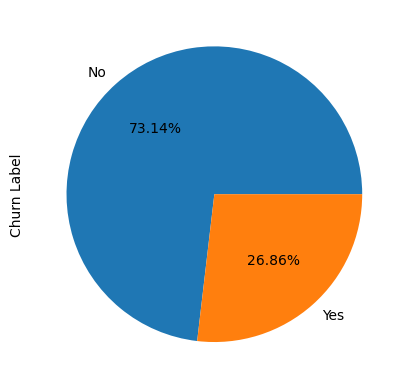

In [33]:
df["Churn Label"].value_counts().plot(kind="pie",autopct='%1.2f%%')

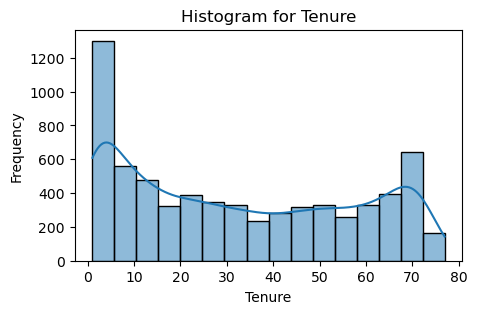

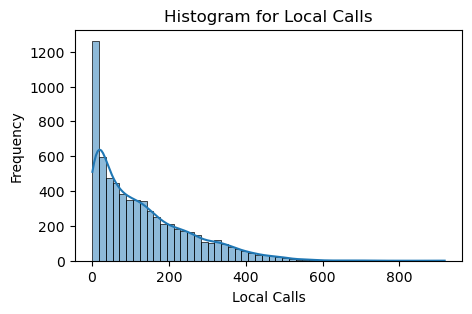

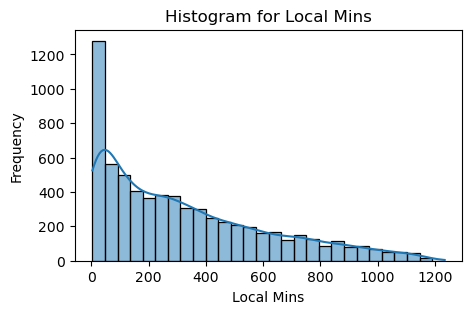

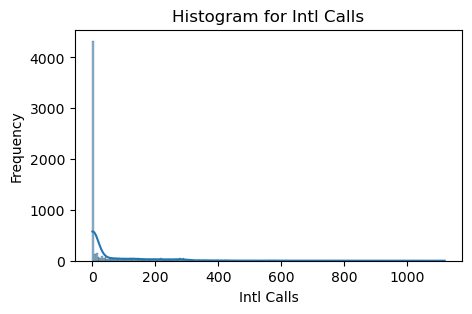

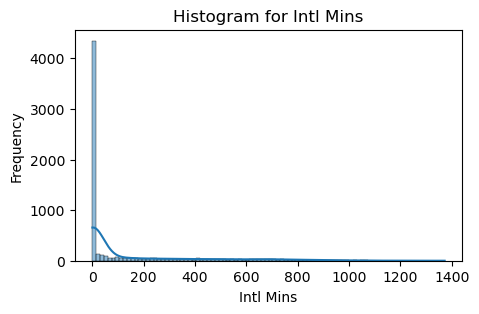

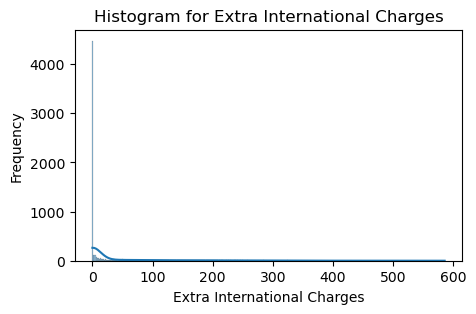

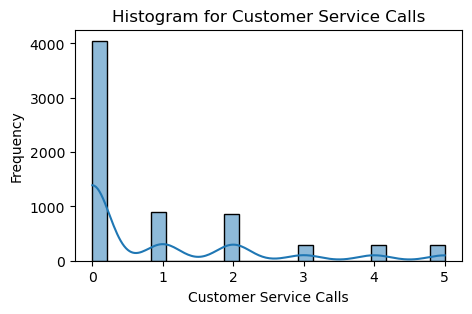

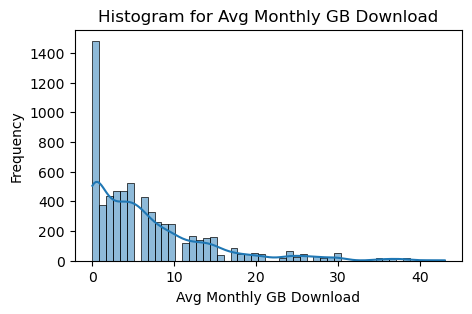

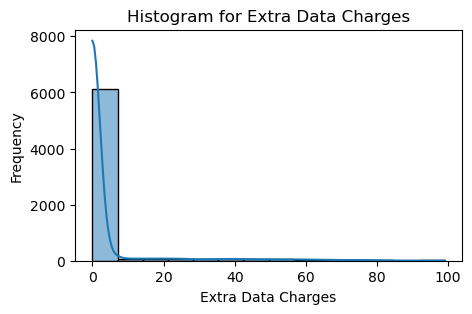

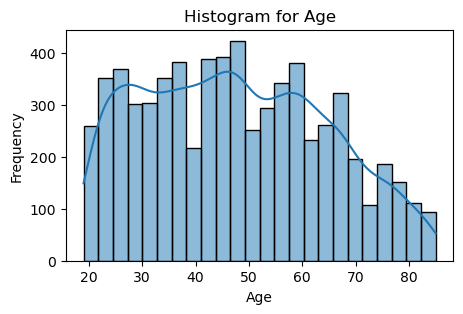

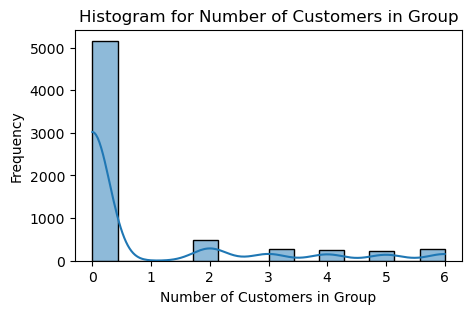

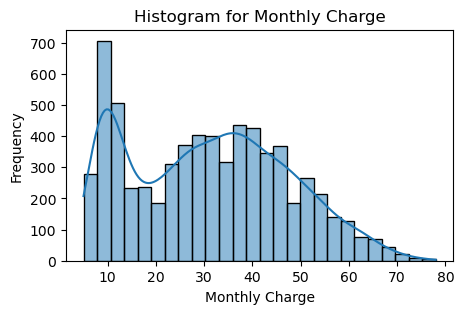

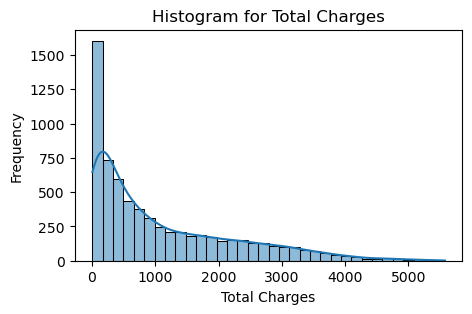

In [34]:
# statistical distribution by histogram of each numerical feature
for feature in NumericVariables:
    plt.figure(figsize=(5, 3))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Histogram for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

Categoric= ['Customer ID', 'Churn Label', 'Intl Active', 'Intl Plan',
       'Unlimited Data Plan', 'State', 'Gender', 'Group',
       'Device Protection & Online Backup', 'Contract Type', 'Payment Method',
       'Churn Category', 'Churn Reason', 'age_group']

for category in Categoric:
    plt.figure(figsize=(5, 3))
    sns.countplot(x=category, data=df)
    plt.title(f'Count Plot for {category}')
    plt.xlabel(category)
    plt.ylabel('Count')

plt.show()


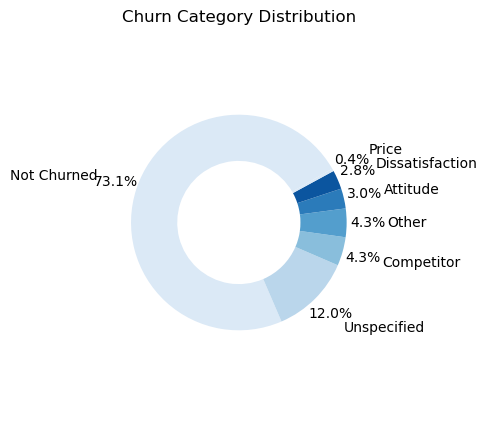

In [35]:
labels = df['Churn Category'].unique()
values = df['Churn Category'].value_counts()

plt.figure(figsize=(10,5))
sns.set_palette("Blues")
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=30, pctdistance=1.2,labeldistance=1.38,wedgeprops=dict(width=0.3),radius=0.7)
plt.title("Churn Category Distribution")
plt.show()

<Axes: xlabel='Gender', ylabel='Churn Category-Churn Reason'>

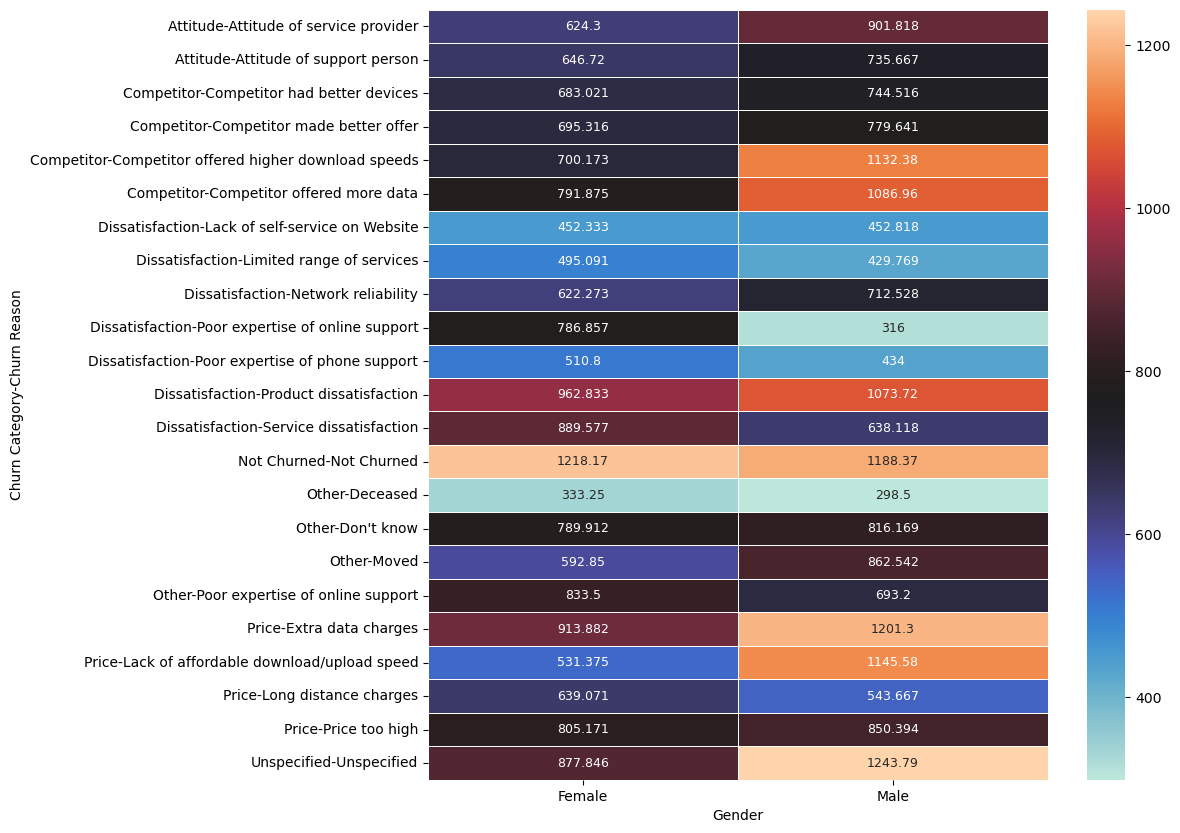

In [36]:
charge_by_gender = pd.pivot_table(df, values='Total Charges', index=['Churn Category','Churn Reason'], columns='Gender')
pd.options.display.float_format = '{:.2f}'.format
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(charge_by_gender, annot=True, linewidths=.5, ax=ax,fmt='g', annot_kws={'fontsize': 9}, cmap="icefire")

<Axes: xlabel='None-Churn Label', ylabel='State'>

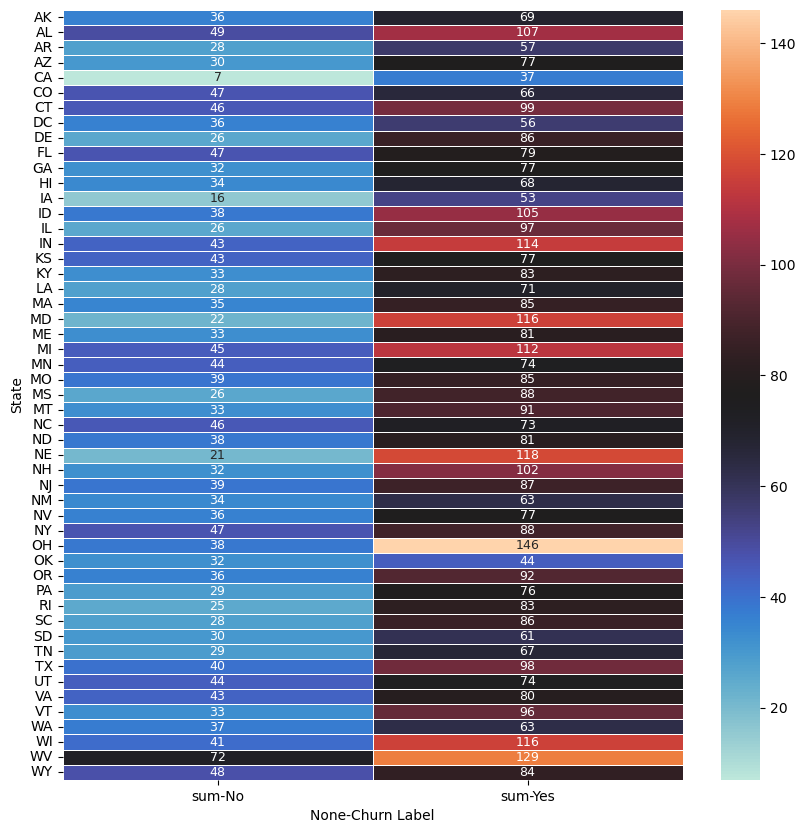

In [37]:
calls_by_state = pd.pivot_table(df, values='Customer Service Calls', index='State', columns='Churn Label', aggfunc=['sum'])
pd.options.display.float_format = '{:.2f}'.format
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(calls_by_state, annot=True, linewidths=.5, ax=ax,fmt='g', annot_kws={'fontsize': 9}, cmap="icefire")

In [38]:
df.columns

Index(['Customer ID', 'Churn Label', 'Tenure', 'Local Calls', 'Local Mins',
       'Intl Calls', 'Intl Mins', 'Intl Active', 'Intl Plan',
       'Extra International Charges', 'Customer Service Calls',
       'Avg Monthly GB Download', 'Unlimited Data Plan', 'Extra Data Charges',
       'State', 'Gender', 'Age', 'Group', 'Number of Customers in Group',
       'Device Protection & Online Backup', 'Contract Type', 'Payment Method',
       'Monthly Charge', 'Total Charges', 'Churn Category', 'Churn Reason',
       'age_group'],
      dtype='object')

<Axes: xlabel='Payment Method', ylabel='Churn Label-Gender'>

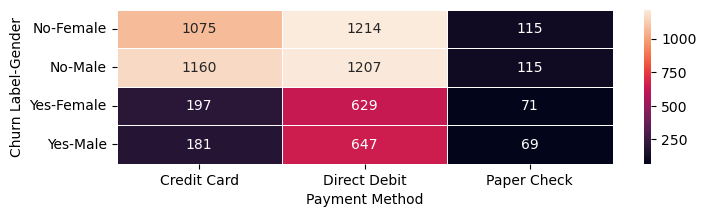

In [39]:
pay_methods = df.pivot_table(values='Customer ID',
                            columns=['Payment Method'], 
                            index=['Churn Label','Gender'], 
                            aggfunc='count')
f, ax = plt.subplots(figsize=(8, 2))
sns.heatmap(pay_methods, annot=True, linewidths=.5, ax=ax,fmt='g', annot_kws={'fontsize': 10})


<Axes: xlabel='Contract Type', ylabel='Churn Label-Gender'>

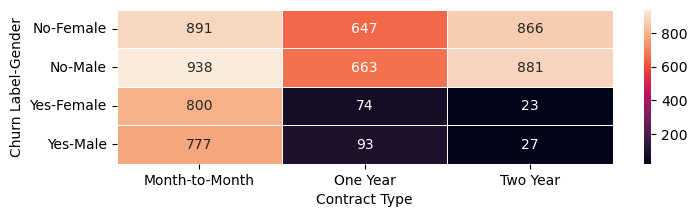

In [40]:
cnt_types = df.pivot_table(values='Customer ID',
                            columns=['Contract Type'], 
                            index=['Churn Label','Gender'], 
                            aggfunc='count')
f, ax = plt.subplots(figsize=(8, 2))
sns.heatmap(cnt_types, annot=True, linewidths=.5, ax=ax,fmt='g', annot_kws={'fontsize': 10})


<Axes: ylabel='Churn Label-Gender-Group'>

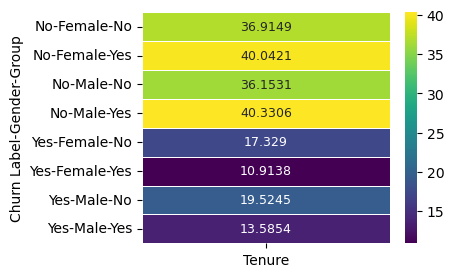

In [41]:
avg_info = df.pivot_table(values=['Tenure'], 
                           index=['Churn Label','Gender','Group'], 
                           aggfunc='mean')
f, ax = plt.subplots(figsize=(4, 3))
sns.heatmap(avg_info, annot=True, linewidths=.5, ax=ax,fmt='g', annot_kws={'fontsize': 9}, cmap="viridis")


<Axes: ylabel='Churn Label-Gender'>

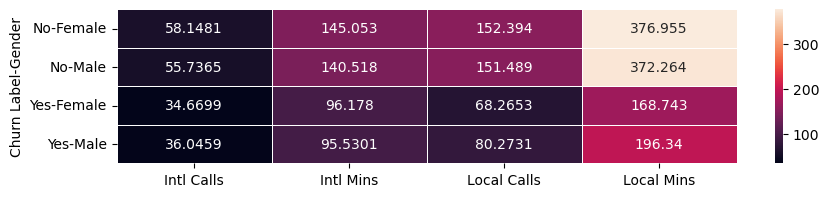

In [42]:
avg_calls = df.pivot_table(values=['Local Mins','Local Calls','Intl Mins','Intl Calls'], 
                           index=['Churn Label','Gender'], 
                           aggfunc='mean')
f, ax = plt.subplots(figsize=(10, 2))
sns.heatmap(avg_calls, annot=True, linewidths=.5, ax=ax,fmt='g', annot_kws={'fontsize': 10})

<Axes: ylabel='Churn Label-Gender'>

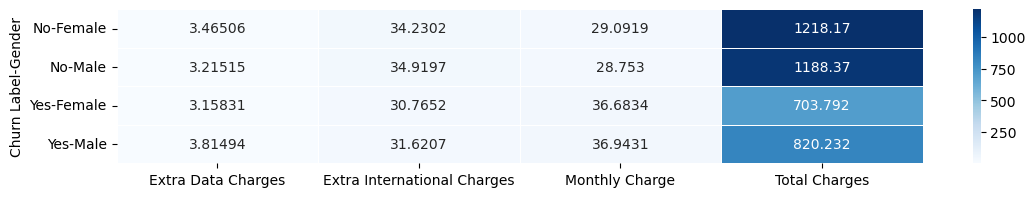

In [43]:
avg_charges = df.pivot_table(values=['Extra International Charges','Extra Data Charges','Monthly Charge','Total Charges'],
                             index=['Churn Label','Gender'],
                             aggfunc='mean')
f, ax = plt.subplots(figsize=(13, 2))
sns.heatmap(avg_charges, annot=True, linewidths=.5, ax=ax,fmt='g', annot_kws={'fontsize': 10},cmap='Blues')

<Axes: xlabel='Churn Label-Gender', ylabel='Churn Category-Churn Reason'>

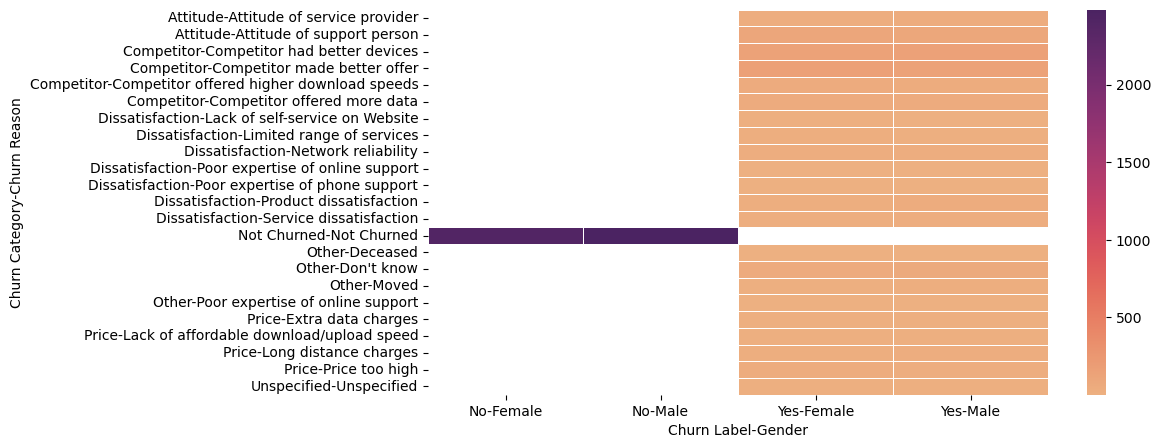

In [44]:
churn_reason_by_category = df.pivot_table(values='Customer ID',
                                    index=['Churn Category','Churn Reason'],
                                    columns=['Churn Label','Gender'],aggfunc='count')
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(churn_reason_by_category, linewidths=.5, ax=ax,fmt='g', annot_kws={'fontsize': 10},cmap='flare')

In [45]:
# to store categorical columns
CategoricalVariables = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", CategoricalVariables)
print(len(CategoricalVariables))

Categorical Columns: Index(['Customer ID', 'Churn Label', 'Intl Active', 'Intl Plan',
       'Unlimited Data Plan', 'State', 'Gender', 'Group',
       'Device Protection & Online Backup', 'Contract Type', 'Payment Method',
       'Churn Category', 'Churn Reason', 'age_group'],
      dtype='object')
14


In [47]:
correlation_matrix = df.corr()

C:\Users\Elif\AppData\Local\Temp\ipykernel_30464\4214245630.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<Axes: >

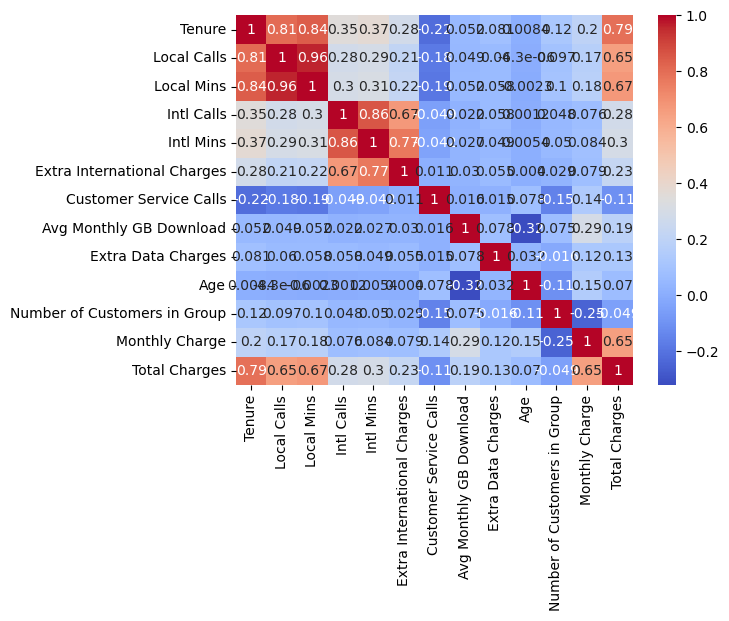

In [48]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

fig, axes = plt.subplots(4,4,figsize=(20,20))

for i, col in enumerate(CategoricalVariables):
    ax=axes[i]
    sns.countplot(x=col, hue='Churn Label', ax=ax, data=df)
    plt.title(f'Count of Churned and Not Churned Customers by {col}')
    
plt.show()

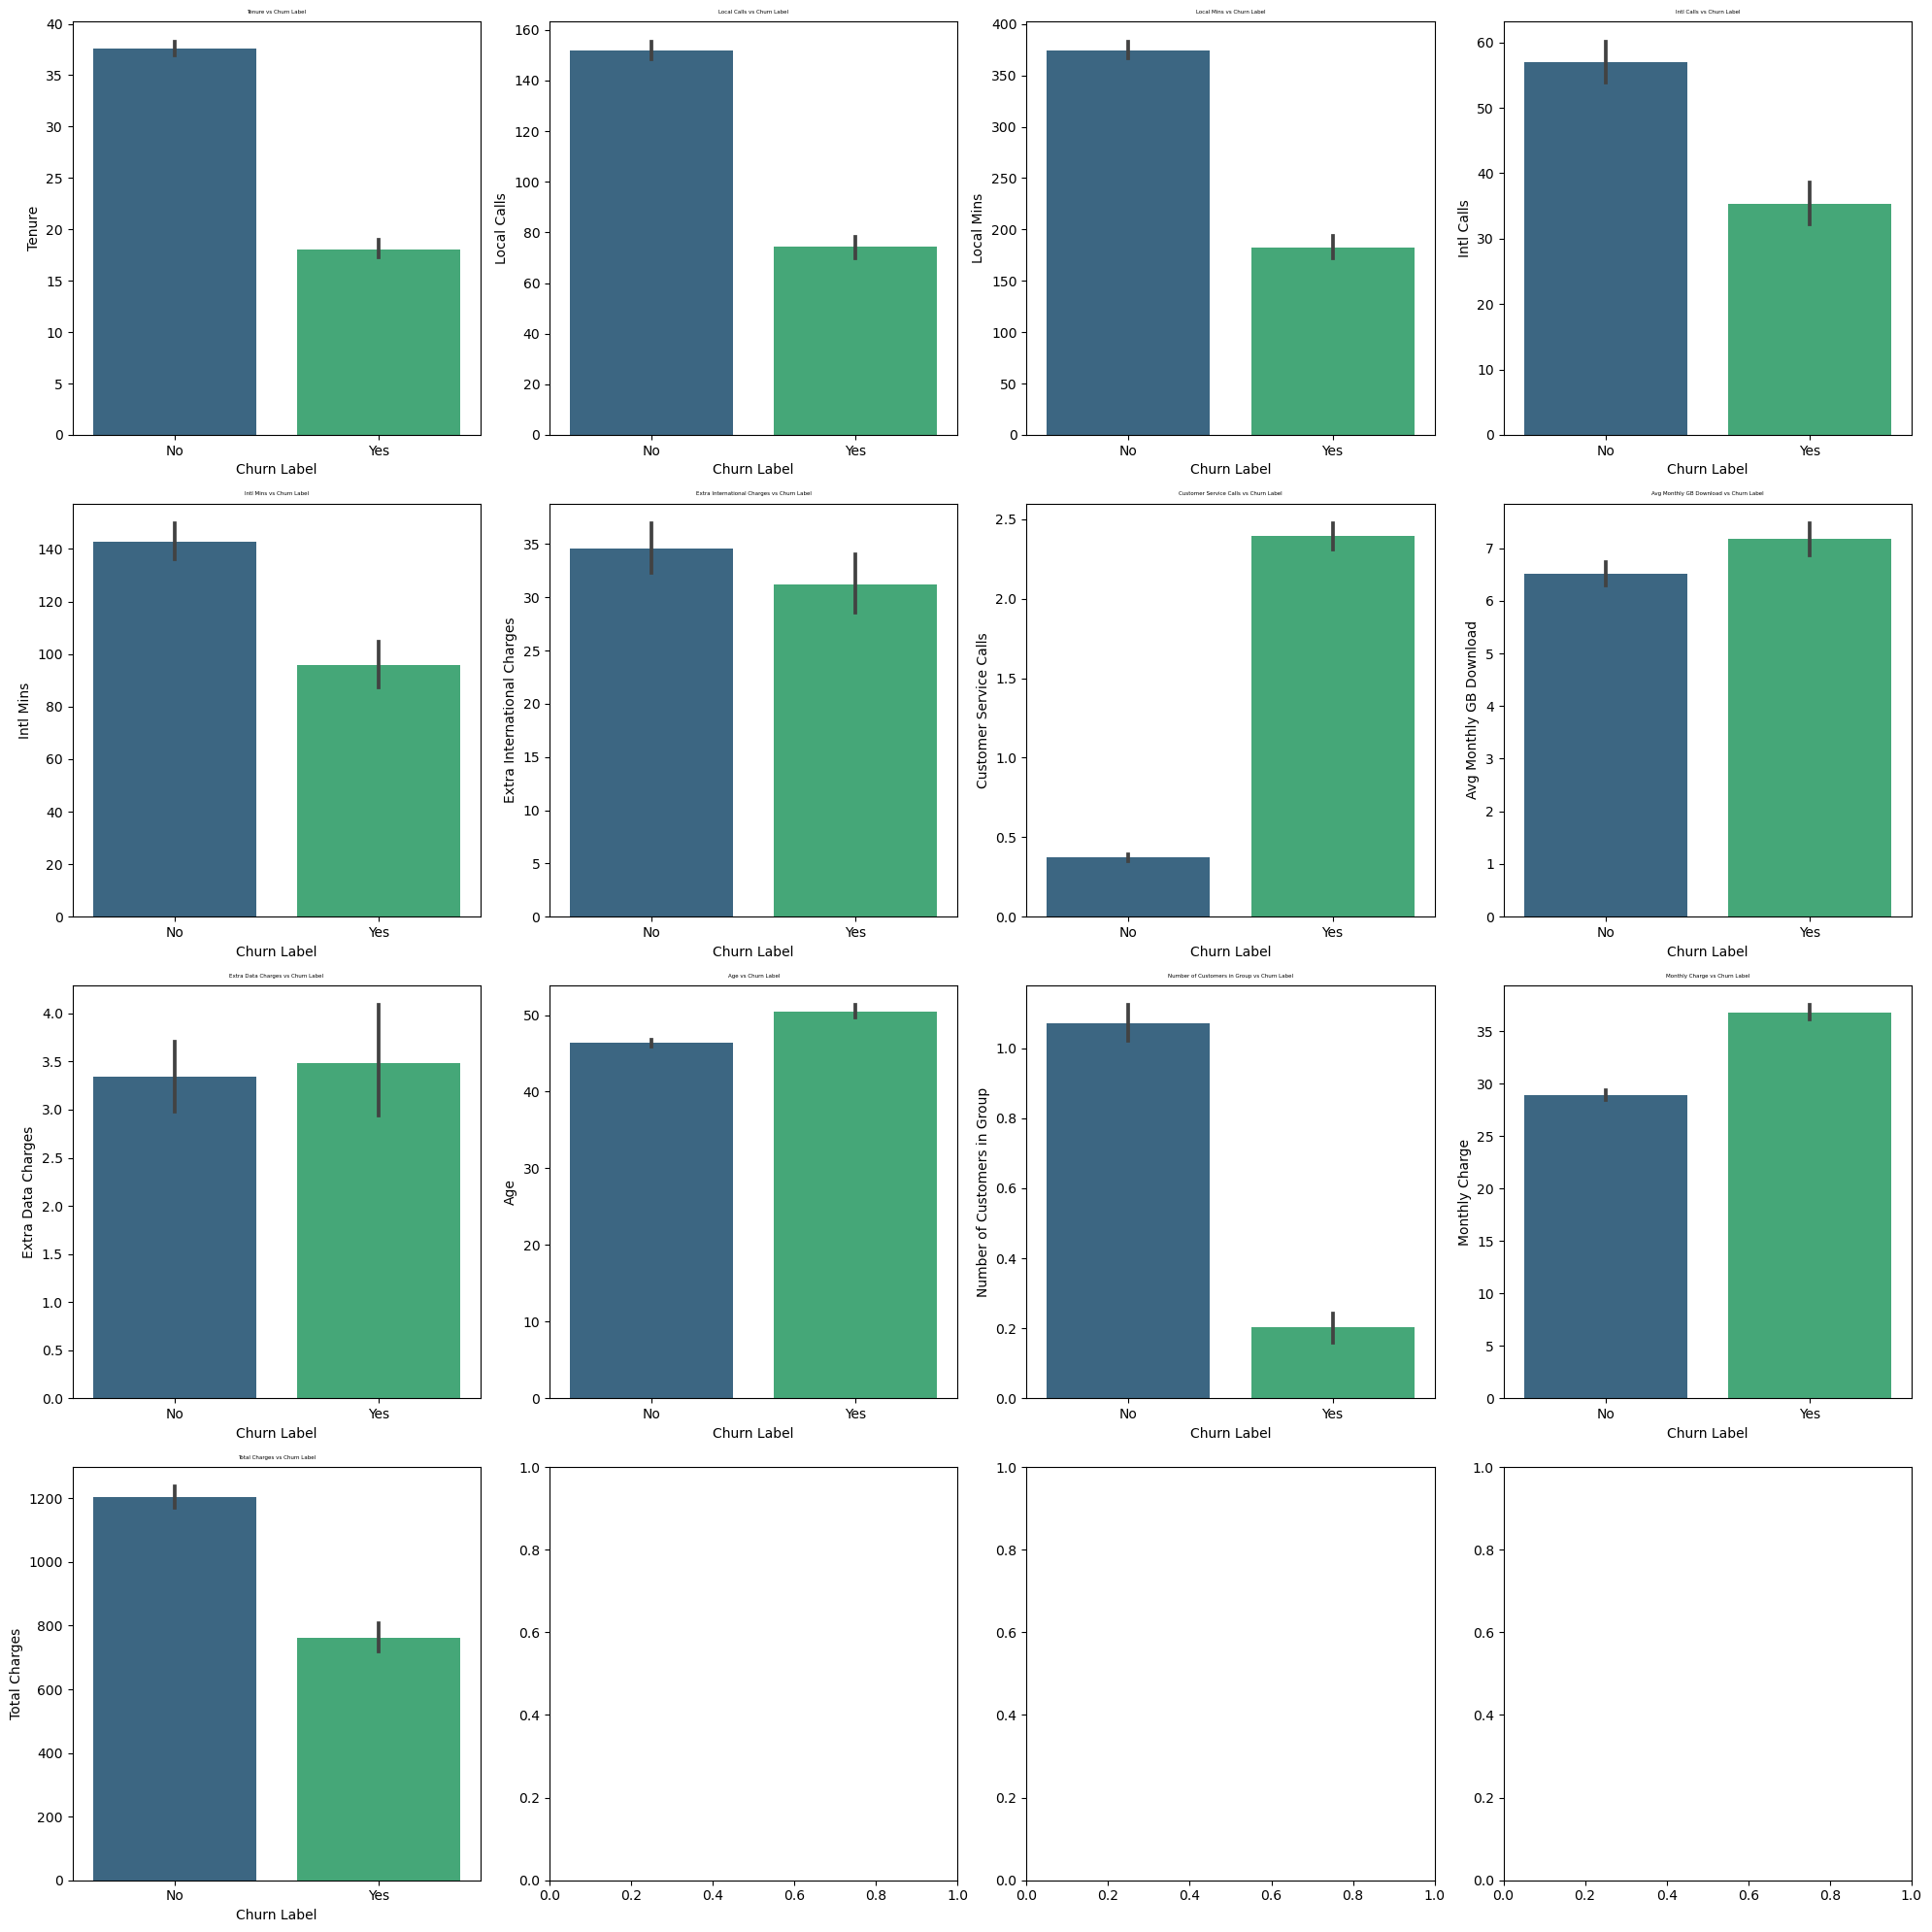

In [49]:
# bar plots for the numeric variables, aggregating the data by mean, also displays std for each numeric variable 
fig, axes = plt.subplots(4, 4, figsize=(20,20))
axes = np.ravel(axes)
for i, col in enumerate(NumericVariables):
    ax = axes[i]
    sns.barplot(data=df, x="Churn Label", y=col, ax=ax, estimator=np.mean,palette="viridis")
    ax.set_title(f"{col} vs Churn Label", fontsize=4)

plt.tight_layout()
plt.show()

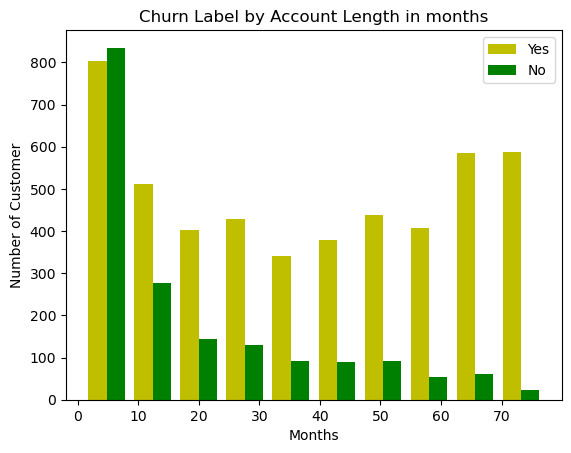

In [50]:
tenure_churned=df[df['Churn Label']=='No'].Tenure
tenure_nchurned=df[df['Churn Label']=='Yes'].Tenure
plt.xlabel('Months')
plt.ylabel('Number of Customer')
plt.title('Churn Label by Account Length in months')
plt.hist([tenure_churned,tenure_nchurned],color=['y','g'],
         label=['Yes','No'])
 
plt.legend()

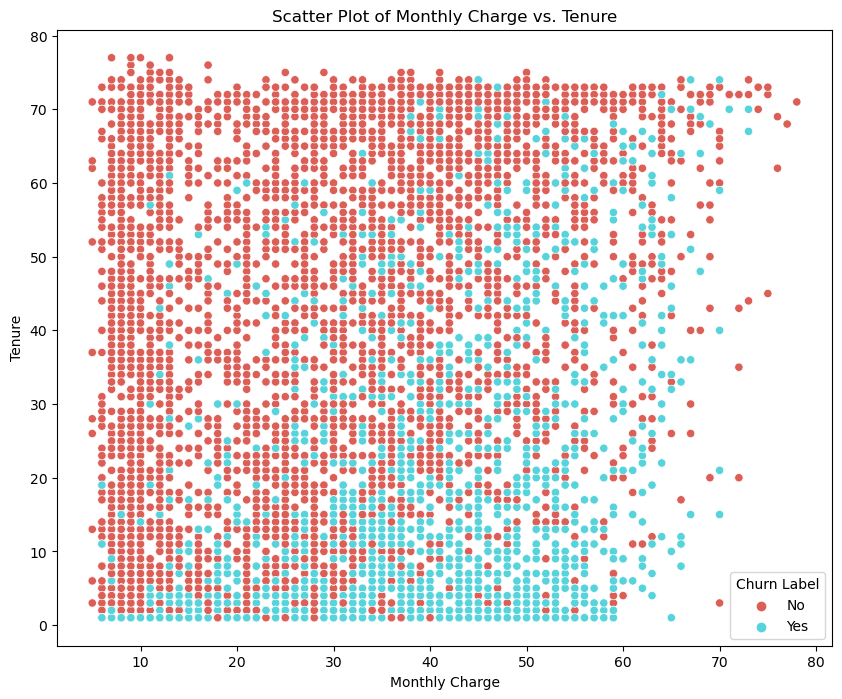

In [51]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df,x='Monthly Charge',y='Tenure',hue='Churn Label',palette='hls')
plt.title('Scatter Plot of Monthly Charge vs. Tenure')
plt.show()

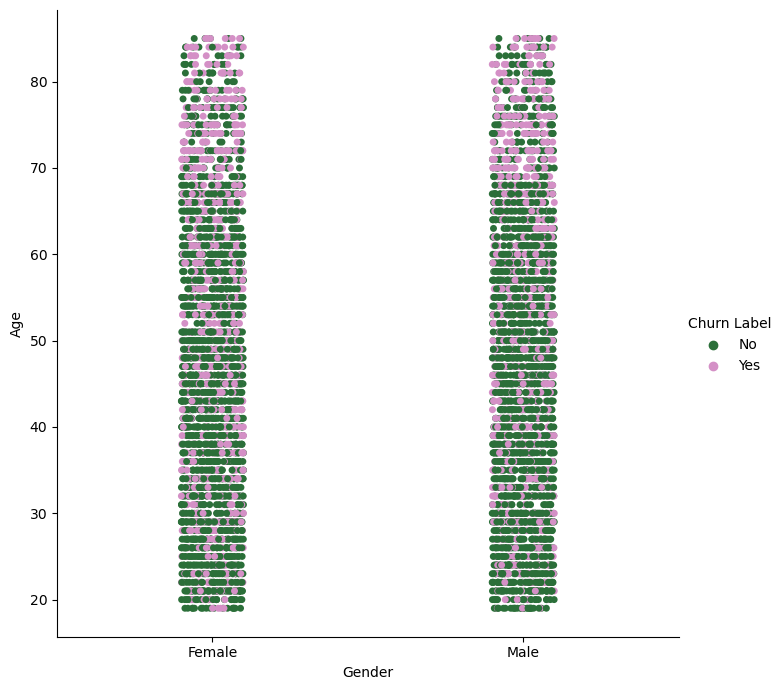

In [58]:
sns.catplot(data=df, x="Gender", y="Age", hue="Churn Label",height=7,palette='cubehelix')
plt.show()

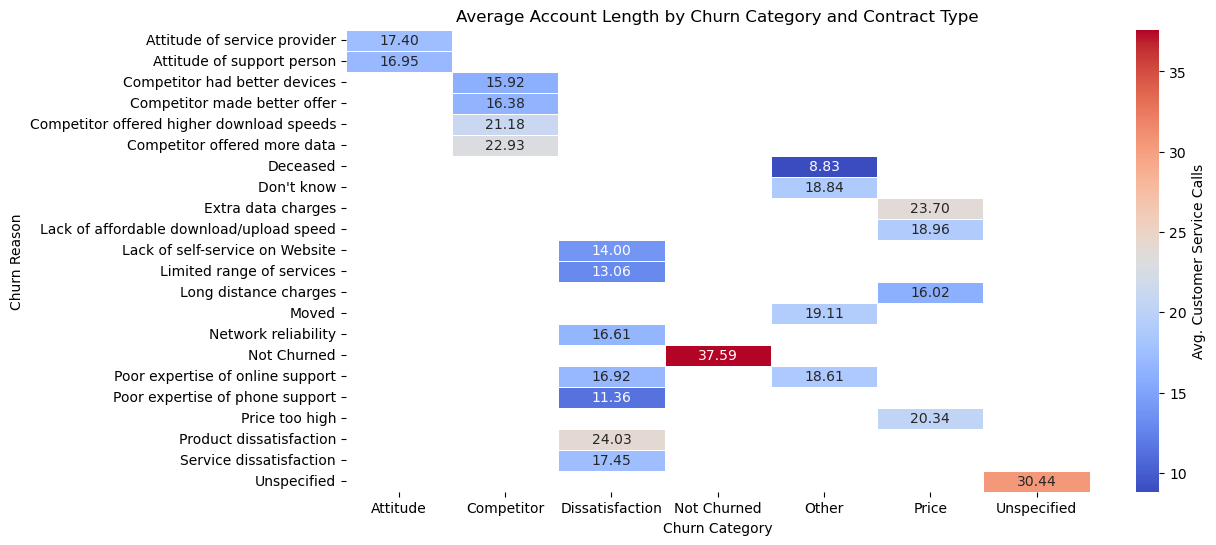

In [59]:
avglength_by_churn = pd.pivot_table(df, values='Tenure', index='Churn Reason', columns='Churn Category', aggfunc=np.mean)
plt.figure(figsize=(12, 6))
sns.heatmap(avglength_by_churn, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, cbar_kws={"label": "Avg. Customer Service Calls"})
plt.title('Average Account Length by Churn Category and Contract Type')
plt.show()

In [60]:
churn_other = df[df['Churn Category'] == "Other"]
churn_other['Churn Reason'].value_counts()

Don't know                          122
Moved                                44
Poor expertise of online support     18
Deceased                              6
Name: Churn Reason, dtype: int64

In [61]:
df.columns

Index(['Customer ID', 'Churn Label', 'Tenure', 'Local Calls', 'Local Mins',
       'Intl Calls', 'Intl Mins', 'Intl Active', 'Intl Plan',
       'Extra International Charges', 'Customer Service Calls',
       'Avg Monthly GB Download', 'Unlimited Data Plan', 'Extra Data Charges',
       'State', 'Gender', 'Age', 'Group', 'Number of Customers in Group',
       'Device Protection & Online Backup', 'Contract Type', 'Payment Method',
       'Monthly Charge', 'Total Charges', 'Churn Category', 'Churn Reason',
       'age_group'],
      dtype='object')

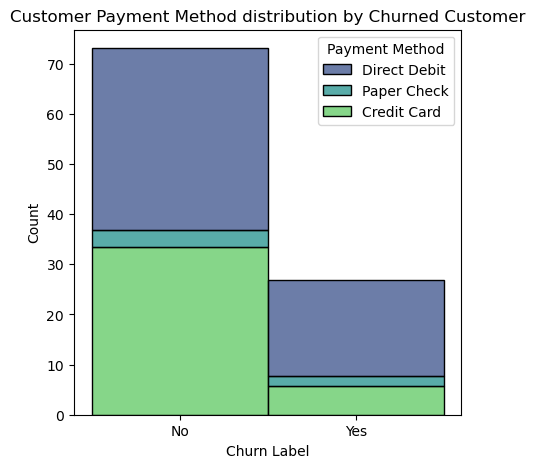

In [62]:
plt.figure(figsize=(5, 5))
sns.histplot(data=df, x='Churn Label', hue='Payment Method', multiple='stack', palette='viridis',stat="percent")
plt.title('Customer Payment Method distribution by Churned Customer')
plt.xlabel('Churn Label')
plt.ylabel('Count')
plt.show()

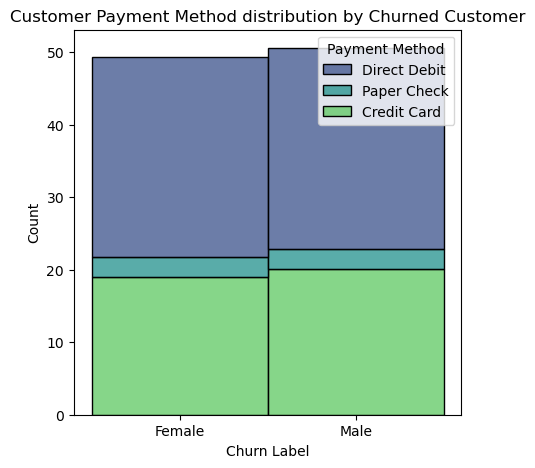

In [63]:
plt.figure(figsize=(5, 5))
sns.histplot(data=df, x='Gender', hue='Payment Method', multiple='stack', palette='viridis',stat="percent")
plt.title('Customer Payment Method distribution by Churned Customer')
plt.xlabel('Churn Label')
plt.ylabel('Count')
plt.show()

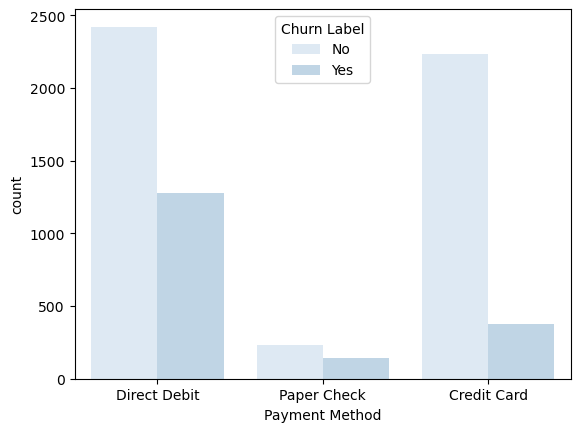

In [64]:
sns.countplot(data=df,x='Payment Method',hue='Churn Label')
plt.show()

In [65]:
churned = df[df["Churn Label"]  == "Yes"]
churned.head()

,Customer ID,Churn Label,Tenure,Local Calls,Local Mins,Intl Calls,Intl Mins,Intl Active,Intl Plan,Extra International Charges,...,Group,Number of Customers in Group,Device Protection & Online Backup,Contract Type,Payment Method,Monthly Charge,Total Charges,Churn Category,Churn Reason,age_group
40,7466-XCMA,Yes,61,107,242.50,0.00,0.00,No,no,0.00,...,No,0,No,Month-to-Month,Direct Debit,45,2717,Unspecified,Unspecified,Under 30
228,9653-TWSS,Yes,16,32,98.60,64.00,180.80,Yes,yes,0.00,...,No,0,No,One Year,Direct Debit,23,377,Unspecified,Unspecified,Senior
239,5509-KHCT,Yes,23,105,348.60,23.00,285.20,Yes,yes,0.00,...,No,0,No,Two Year,Credit Card,16,364,Unspecified,Unspecified,Other
318,9843-UGSQ,Yes,29,113,205.20,116.00,232.00,Yes,no,116.00,...,No,0,No,Month-to-Month,Paper Check,30,872,Unspecified,Unspecified,Other
408,8079-UPTX,Yes,9,48,136.50,90.00,84.60,Yes,no,21.20,...,No,0,No,Month-to-Month,Credit Card,60,545,Unspecified,Unspecified,Other


In [66]:
churned['Customer ID'].count()

1794

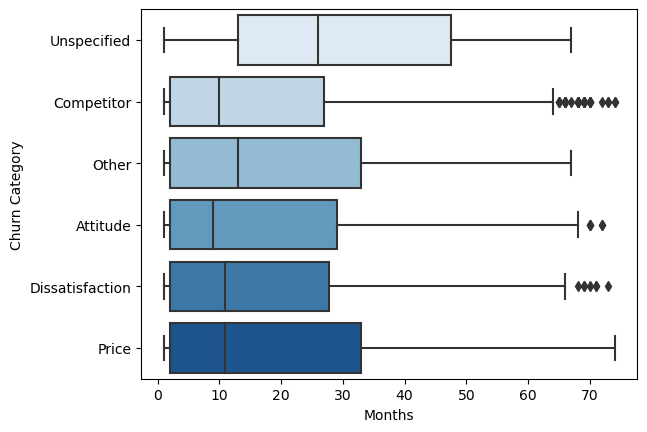

In [67]:
sns.boxplot(data=churned,x='Tenure',y="Churn Category")
plt.xlabel("Months")
plt.show()

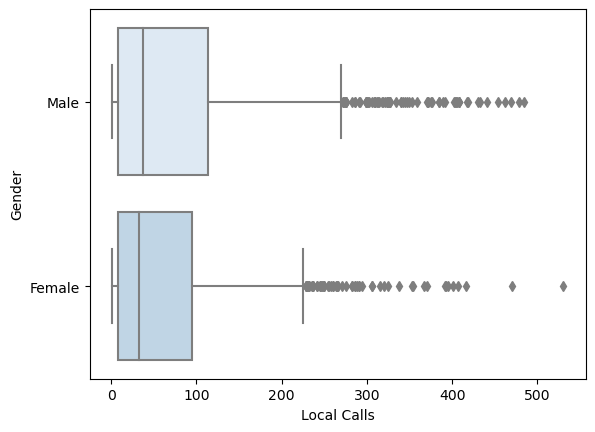

In [68]:
sns.boxplot(data=churned,x='Local Calls',y='Gender')
plt.show()

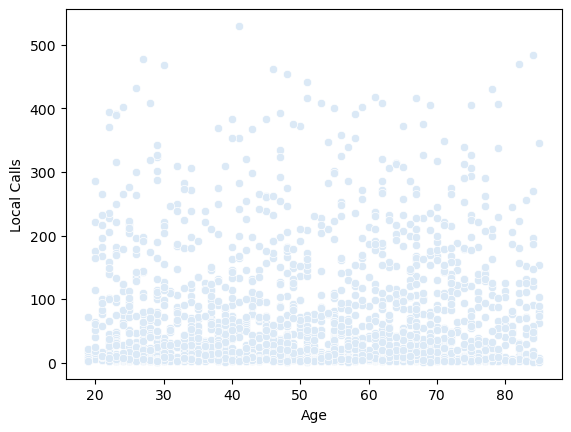

In [69]:
sns.scatterplot(data=churned,x='Age',y='Local Calls')
plt.show()

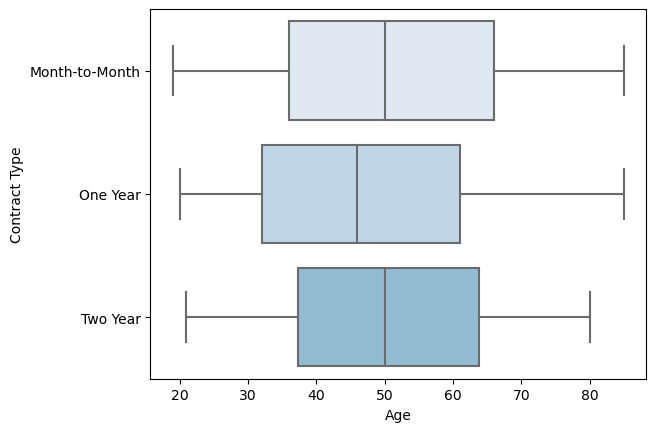

In [70]:
sns.boxplot(data=churned,x='Age',y='Contract Type')
plt.show()

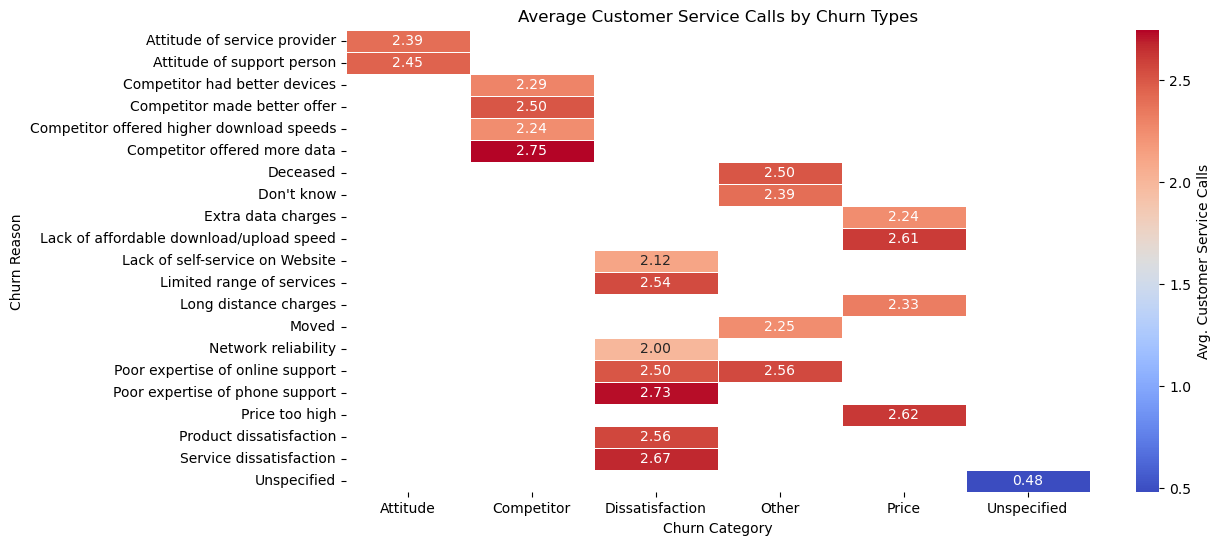

In [71]:
avgcstcalls_by_churn = pd.pivot_table(churned, values='Customer Service Calls', index='Churn Reason', columns='Churn Category', aggfunc=np.mean)
plt.figure(figsize=(12, 6))
sns.heatmap(avgcstcalls_by_churn, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, cbar_kws={"label": "Avg. Customer Service Calls"})
plt.title('Average Customer Service Calls by Churn Types')
plt.show()

# Preprocessing

In [72]:
def threshold_for_outliers(data, numericfeature, low_quantile=0.05, up_quantile=0.95):
    quantile_one = data[numericfeature].quantile(low_quantile)
    quantile_three = data[numericfeature].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit

In [73]:
def have_outliers(data, numericfeatures, plot=False):
    for col in numericfeatures:
        low_limit, up_limit = threshold_for_outliers(data, col)
        if data[(data[col] > up_limit) | (data[col] < low_limit)].any(axis=None):
            number_of_outliers = data[(data[col] > up_limit) | (data[col] < low_limit)].shape[0]
            print(col, " : ", number_of_outliers, "outliers")
            if plot:
                sns.boxplot(x=data[col])
                plt.show()

In [74]:
for var in NumericVariables:
    print(var, "has " , have_outliers(df, [var]),  "Outliers")

Tenure has  None Outliers
Local Calls has  None Outliers
Local Mins has  None Outliers
Intl Calls  :  14 outliers
Intl Calls has  None Outliers
Intl Mins has  None Outliers
Extra International Charges  :  6 outliers
Extra International Charges has  None Outliers
Customer Service Calls has  None Outliers
Avg Monthly GB Download has  None Outliers
Extra Data Charges  :  39 outliers
Extra Data Charges has  None Outliers
Age has  None Outliers
Number of Customers in Group has  None Outliers
Monthly Charge has  None Outliers
Total Charges has  None Outliers


In [75]:
def binary_categoric_cols(df):
    for column in df:
        if df[column].dtypes == 'object':
            unique_values = df[column].unique()
            if len(unique_values) < 10:
                print(f'{column}: {unique_values}')

binary_categoric_cols(df)

Churn Label: ['No' 'Yes']
Intl Active: ['No' 'Yes']
Intl Plan: ['no' 'yes']
Unlimited Data Plan: ['Yes' 'No']
Gender: ['Female' 'Male']
Group: ['No' 'Yes']
Device Protection & Online Backup: ['No' 'Yes']
Contract Type: ['Month-to-Month' 'One Year' 'Two Year']
Payment Method: ['Direct Debit' 'Paper Check' 'Credit Card']
Churn Category: ['Not Churned' 'Unspecified' 'Competitor' 'Other' 'Attitude'
 'Dissatisfaction' 'Price']
age_group: ['Other' 'Under 30' 'Senior']


In [76]:
def unique_values(data):
    for column in data:
        if df[column].dtypes=='object':
            print(f'{column}:{data[column].unique()}')
unique_values(df)

Customer ID:['4444-BZPU' '5676-PTZX' '8532-ZEKQ' ... '7029-XDVM' '6614-NAJG'
 '5104-AGDX']
Churn Label:['No' 'Yes']
Intl Active:['No' 'Yes']
Intl Plan:['no' 'yes']
Unlimited Data Plan:['Yes' 'No']
State:['KS' 'OH' 'MO' 'WV' 'RI' 'IA' 'NY' 'ID' 'VT' 'TX' 'CO' 'SC' 'NE' 'IL'
 'NH' 'LA' 'AZ' 'OK' 'GA' 'MA' 'MD' 'AR' 'WI' 'OR' 'MI' 'WY' 'VA' 'CA'
 'MN' 'SD' 'WA' 'UT' 'NJ' 'NM' 'NV' 'DC' 'IN' 'KY' 'ME' 'MT' 'MS' 'AL'
 'FL' 'AK' 'DE' 'TN' 'NC' 'CT' 'PA' 'ND' 'HI']
Gender:['Female' 'Male']
Group:['No' 'Yes']
Device Protection & Online Backup:['No' 'Yes']
Contract Type:['Month-to-Month' 'One Year' 'Two Year']
Payment Method:['Direct Debit' 'Paper Check' 'Credit Card']
Churn Category:['Not Churned' 'Unspecified' 'Competitor' 'Other' 'Attitude'
 'Dissatisfaction' 'Price']
Churn Reason:['Not Churned' 'Unspecified' 'Competitor made better offer' 'Moved'
 'Competitor had better devices'
 'Competitor offered higher download speeds' 'Attitude of support person'
 'Network reliability' "Don't know" 'Se

In [77]:
df2 = df .copy()

In [78]:
df2['Churn Label']=df2['Churn Label'].map({"No":0,"Yes":1})
df2.head()

,Customer ID,Churn Label,Tenure,Local Calls,Local Mins,Intl Calls,Intl Mins,Intl Active,Intl Plan,Extra International Charges,...,Group,Number of Customers in Group,Device Protection & Online Backup,Contract Type,Payment Method,Monthly Charge,Total Charges,Churn Category,Churn Reason,age_group
0,4444-BZPU,0,1,3,8.00,0.00,0.00,No,no,0.00,...,No,0,No,Month-to-Month,Direct Debit,10,10,Not Churned,Not Churned,Other
1,5676-PTZX,0,33,179,431.30,0.00,0.00,No,no,0.00,...,No,0,Yes,One Year,Paper Check,21,703,Not Churned,Not Churned,Other
2,8532-ZEKQ,0,44,82,217.60,0.00,0.00,No,yes,0.00,...,No,0,Yes,One Year,Direct Debit,23,1014,Not Churned,Not Churned,Other
3,1314-SMPJ,0,10,47,111.60,60.00,71.00,Yes,yes,0.00,...,No,0,No,Month-to-Month,Paper Check,17,177,Not Churned,Not Churned,Other
4,2956-TXCJ,0,62,184,621.20,310.00,694.40,Yes,yes,0.00,...,No,0,No,One Year,Direct Debit,28,1720,Not Churned,Not Churned,Other


In [79]:
df2 = df2.drop('Customer ID', axis=1)
df2.head()

,Churn Label,Tenure,Local Calls,Local Mins,Intl Calls,Intl Mins,Intl Active,Intl Plan,Extra International Charges,Customer Service Calls,...,Group,Number of Customers in Group,Device Protection & Online Backup,Contract Type,Payment Method,Monthly Charge,Total Charges,Churn Category,Churn Reason,age_group
0,0,1,3,8.00,0.00,0.00,No,no,0.00,0,...,No,0,No,Month-to-Month,Direct Debit,10,10,Not Churned,Not Churned,Other
1,0,33,179,431.30,0.00,0.00,No,no,0.00,0,...,No,0,Yes,One Year,Paper Check,21,703,Not Churned,Not Churned,Other
2,0,44,82,217.60,0.00,0.00,No,yes,0.00,0,...,No,0,Yes,One Year,Direct Debit,23,1014,Not Churned,Not Churned,Other
3,0,10,47,111.60,60.00,71.00,Yes,yes,0.00,0,...,No,0,No,Month-to-Month,Paper Check,17,177,Not Churned,Not Churned,Other
4,0,62,184,621.20,310.00,694.40,Yes,yes,0.00,0,...,No,0,No,One Year,Direct Debit,28,1720,Not Churned,Not Churned,Other


drop senior or 30, relation btw ctegory/reason, lasso ridge for variables
calculate quantile of most effective by eda variable and label outliers, 


In [80]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6680 entries, 0 to 6686
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Churn Label                        6680 non-null   int64  
 1   Tenure                             6680 non-null   int64  
 2   Local Calls                        6680 non-null   int64  
 3   Local Mins                         6680 non-null   float64
 4   Intl Calls                         6680 non-null   float64
 5   Intl Mins                          6680 non-null   float64
 6   Intl Active                        6680 non-null   object 
 7   Intl Plan                          6680 non-null   object 
 8   Extra International Charges        6680 non-null   float64
 9   Customer Service Calls             6680 non-null   int64  
 10  Avg Monthly GB Download            6680 non-null   int64  
 11  Unlimited Data Plan                6680 non-null   objec

In [81]:
# for the non-ordinal categorical columns
categorical_columns = ['Intl Active', 'Intl Plan','Unlimited Data Plan',
        'State', 'Gender', 'Group', 'Device Protection & Online Backup',
        'Contract Type', 'Payment Method','Churn Category', 'age_group']
       
df2 = pd.get_dummies(df2, columns=categorical_columns, prefix=categorical_columns)

df2.head()

,Churn Label,Tenure,Local Calls,Local Mins,Intl Calls,Intl Mins,Extra International Charges,Customer Service Calls,Avg Monthly GB Download,Extra Data Charges,...,Churn Category_Attitude,Churn Category_Competitor,Churn Category_Dissatisfaction,Churn Category_Not Churned,Churn Category_Other,Churn Category_Price,Churn Category_Unspecified,age_group_Other,age_group_Senior,age_group_Under 30
0,0,1,3,8.00,0.00,0.00,0.00,0,3,0,...,0,0,0,1,0,0,0,1,0,0
1,0,33,179,431.30,0.00,0.00,0.00,0,3,0,...,0,0,0,1,0,0,0,1,0,0
2,0,44,82,217.60,0.00,0.00,0.00,0,3,0,...,0,0,0,1,0,0,0,1,0,0
3,0,10,47,111.60,60.00,71.00,0.00,0,2,0,...,0,0,0,1,0,0,0,1,0,0
4,0,62,184,621.20,310.00,694.40,0.00,0,3,0,...,0,0,0,1,0,0,0,1,0,0


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i, col in enumerate(CategoricalVariables): 
    le.fit(df[col])
    list(le.classes_)
    df[col] = le.transform(df[col])

In [82]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df2['Churn Reason'] = le.fit_transform(df2['Churn Reason'])
df2.head()

,Churn Label,Tenure,Local Calls,Local Mins,Intl Calls,Intl Mins,Extra International Charges,Customer Service Calls,Avg Monthly GB Download,Extra Data Charges,...,Churn Category_Attitude,Churn Category_Competitor,Churn Category_Dissatisfaction,Churn Category_Not Churned,Churn Category_Other,Churn Category_Price,Churn Category_Unspecified,age_group_Other,age_group_Senior,age_group_Under 30
0,0,1,3,8.00,0.00,0.00,0.00,0,3,0,...,0,0,0,1,0,0,0,1,0,0
1,0,33,179,431.30,0.00,0.00,0.00,0,3,0,...,0,0,0,1,0,0,0,1,0,0
2,0,44,82,217.60,0.00,0.00,0.00,0,3,0,...,0,0,0,1,0,0,0,1,0,0
3,0,10,47,111.60,60.00,71.00,0.00,0,2,0,...,0,0,0,1,0,0,0,1,0,0
4,0,62,184,621.20,310.00,694.40,0.00,0,3,0,...,0,0,0,1,0,0,0,1,0,0


In [83]:
# lets one more time asa preprocessing step, check for any missing value
df2.isnull().sum()

Churn Label                   0
Tenure                        0
Local Calls                   0
Local Mins                    0
Intl Calls                    0
                             ..
Churn Category_Price          0
Churn Category_Unspecified    0
age_group_Other               0
age_group_Senior              0
age_group_Under 30            0
Length: 94, dtype: int64

In [84]:
# Standard Scaling for the numeric columns that are in a range and not having outliers
standard_scaler = StandardScaler()
df2[['Tenure', 'Age', 'Number of Customers in Group', 'Monthly Charge', 'Total Charges',
     'Avg Monthly GB Download', 'Local Calls', 'Local Mins', 'Intl Mins',
     'Customer Service Calls']] = standard_scaler.fit_transform(df2[['Tenure', 'Age', 'Number of Customers in Group', 
                                                                     'Monthly Charge', 'Total Charges',
                                                                     'Avg Monthly GB Download', 'Local Calls',
                                                                     'Local Mins', 'Intl Mins', 'Customer Service Calls']])

# Min-Max Scaling for numeric features that have outliers
min_max_scaler = MinMaxScaler()
df2[['Intl Calls', 'Extra International Charges','Extra Data Charges']] = min_max_scaler.fit_transform(df2[['Intl Calls',
                                                                                                            'Extra International Charges',
                                                                                                            'Extra Data Charges']])

df2.head()

,Churn Label,Tenure,Local Calls,Local Mins,Intl Calls,Intl Mins,Extra International Charges,Customer Service Calls,Avg Monthly GB Download,Extra Data Charges,...,Churn Category_Attitude,Churn Category_Competitor,Churn Category_Dissatisfaction,Churn Category_Not Churned,Churn Category_Other,Churn Category_Price,Churn Category_Unspecified,age_group_Other,age_group_Senior,age_group_Under 30
0,0,-1.27,-1.05,-1.09,0.00,-0.53,0.00,-0.65,-0.50,0.00,...,0,0,0,1,0,0,0,1,0,0
1,0,0.03,0.39,0.38,0.00,-0.53,0.00,-0.65,-0.50,0.00,...,0,0,0,1,0,0,0,1,0,0
2,0,0.47,-0.40,-0.37,0.00,-0.53,0.00,-0.65,-0.50,0.00,...,0,0,0,1,0,0,0,1,0,0
3,0,-0.91,-0.69,-0.73,0.05,-0.24,0.00,-0.65,-0.63,0.00,...,0,0,0,1,0,0,0,1,0,0
4,0,1.21,0.43,1.03,0.28,2.32,0.00,-0.65,-0.50,0.00,...,0,0,0,1,0,0,0,1,0,0


In [85]:
df2.isnull().sum()

Churn Label                   0
Tenure                        0
Local Calls                   0
Local Mins                    0
Intl Calls                    0
                             ..
Churn Category_Price          0
Churn Category_Unspecified    0
age_group_Other               0
age_group_Senior              0
age_group_Under 30            0
Length: 94, dtype: int64

In [86]:
df2.isna().sum()

Churn Label                   0
Tenure                        0
Local Calls                   0
Local Mins                    0
Intl Calls                    0
                             ..
Churn Category_Price          0
Churn Category_Unspecified    0
age_group_Other               0
age_group_Senior              0
age_group_Under 30            0
Length: 94, dtype: int64

In [87]:
X = df2.drop('Churn Label',axis=1)
y = df2['Churn Label']

# Train-Test Separation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4563)

# Modeling a LogisticRegression & Hypertuning with GridSearchCV by using parameters

In [88]:
# first selection of model is logistic reg
logistic_model = LogisticRegression(random_state=4563)
logistic_model.fit(X_train, y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=4563)

In [89]:
y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1485
           1       1.00      1.00      1.00       519

    accuracy                           1.00      2004
   macro avg       1.00      1.00      1.00      2004
weighted avg       1.00      1.00      1.00      2004

Confusion Matrix:
[[1485    0]
 [   0  519]]


In [90]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}

logistic_model = LogisticRegression(random_state=4563)

grid_search = GridSearchCV(logistic_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

best_logistic_model = LogisticRegression(**best_params, random_state=4563)
best_logistic_model.fit(X_train, y_train)


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
T

Best Hyperparameters: {'C': 1, 'penalty': 'l2'}


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1, random_state=4563)

In [91]:
y_pred_best = best_logistic_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy with Best Hyperparameters: {accuracy_best:.2f}")
print(f"Best parameters: {best_params}")

Accuracy with Best Hyperparameters: 1.00
Best parameters: {'C': 1, 'penalty': 'l2'}


# Modeling with RandomForestClassifier & Hypertuning with RandomizedSearch by using parameters

In [92]:
rfc_model = RandomForestClassifier(random_state=4563)
rfc_model.fit(X_train, y_train)

RandomForestClassifier(random_state=4563)

In [93]:
# Make predictions
y_pred = rfc_model.predict(X_test)

rfc_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {rfc_accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1485
           1       1.00      1.00      1.00       519

    accuracy                           1.00      2004
   macro avg       1.00      1.00      1.00      2004
weighted avg       1.00      1.00      1.00      2004



In [94]:
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8],
    'bootstrap': [True, False]
}
 
random_search = RandomizedSearchCV(rfc_model, param_distributions=param_dist, n_iter=10, cv=5, random_state=4563)
random_search.fit(X_train, y_train)
 
best_params = random_search.best_params_
print(f"Best Hyperparameters: {best_params}")
 
best_rfc_model = RandomForestClassifier(**best_params, random_state=4563)
best_rfc_model.fit(X_train, y_train)
 
y_pred_best = best_rfc_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy with Best Hyperparameters: {accuracy_best:.2f}")
 
print("Classification Report:")
print(classification_report(y_test, y_pred_best))

Best Hyperparameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': False}
Accuracy with Best Hyperparameters: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1485
           1       1.00      1.00      1.00       519

    accuracy                           1.00      2004
   macro avg       1.00      1.00      1.00      2004
weighted avg       1.00      1.00      1.00      2004



# Hypertuning by ccp_alpha
   to check if there are enough alphas for plotting before attempting to create the graph. 
   -> If ccp_alphas has only one element or is empty, it returns a message indicating that there are not enough alphas for plotting 
   -> unless otherwise, it plots the graph

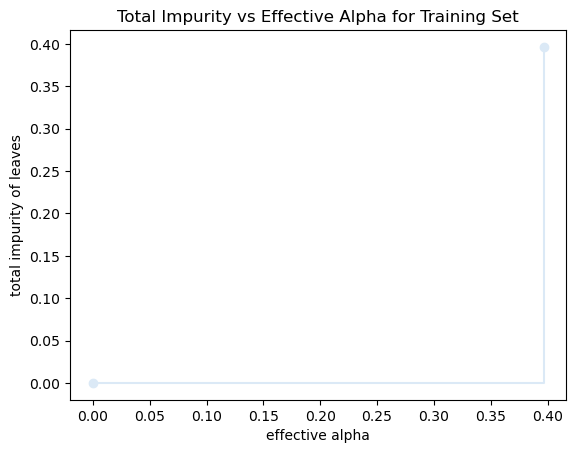

In [97]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

dec_tree = DecisionTreeClassifier(random_state=4563)
dec_tree.fit(X_train, y_train)

path = dec_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas, impurities, marker='o', drawstyle='steps-post')
ax.set_xlabel('effective alpha')
ax.set_ylabel('total impurity of leaves')
ax.set_title('Total Impurity vs Effective Alpha for Training Set')

plt.show()

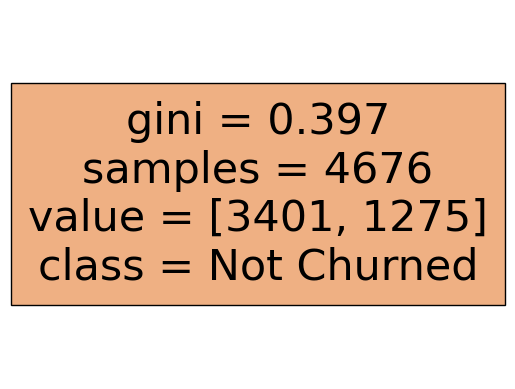

In [98]:
from sklearn.tree import plot_tree

# DecisionTreeClassifier with the optimal alpha 
alpha_optimal = ccp_alphas[np.argmax(impurities)]
pruned_tree = DecisionTreeClassifier(random_state=4563, ccp_alpha=alpha_optimal)
pruned_tree.fit(X_train, y_train)

plt.figure()
plot_tree(pruned_tree, filled=True, feature_names=X_train.columns, class_names=['Not Churned', 'Churned'])
plt.show()

In [99]:
dtc = DecisionTreeClassifier(random_state=0)
path = dtc.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

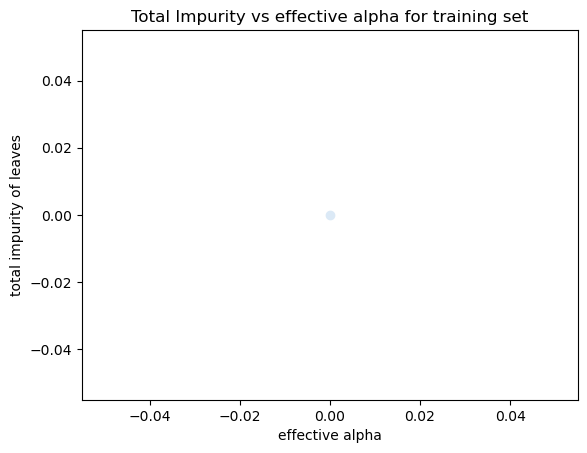

In [100]:
# Check if ccp_alphas is empty or has only one element
if len(path.ccp_alphas) <= 1:
    print("Not enough alphas for plotting.")
else:
    ccp_alphas, impurities = path.ccp_alphas, path.impurities
    fig, ax = plt.subplots()
    ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
    ax.set_xlabel("effective alpha")
    ax.set_ylabel("total impurity of leaves")
    ax.set_title("Total Impurity vs effective alpha for training set")
    plt.show()

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

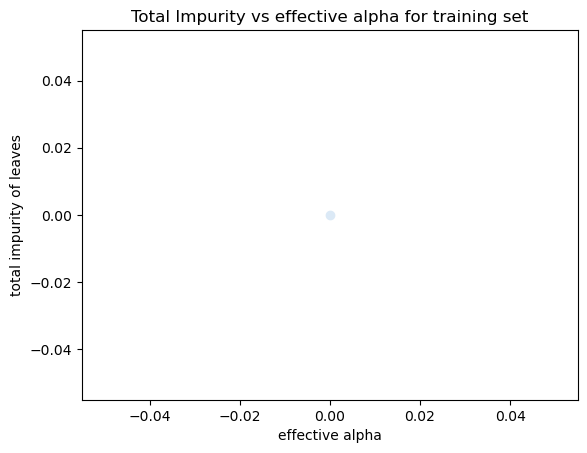

In [101]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [102]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.39664118542823923


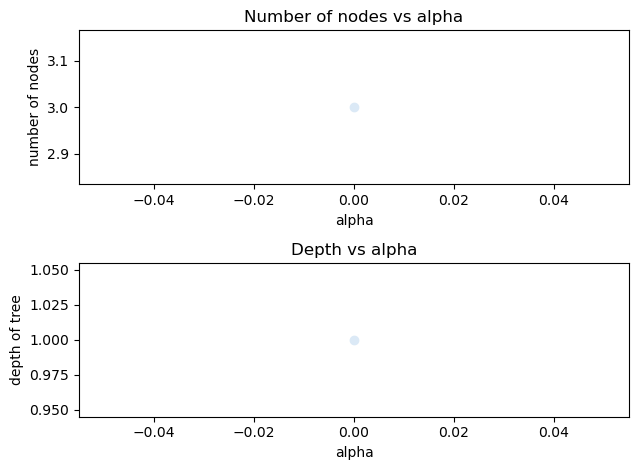

In [103]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

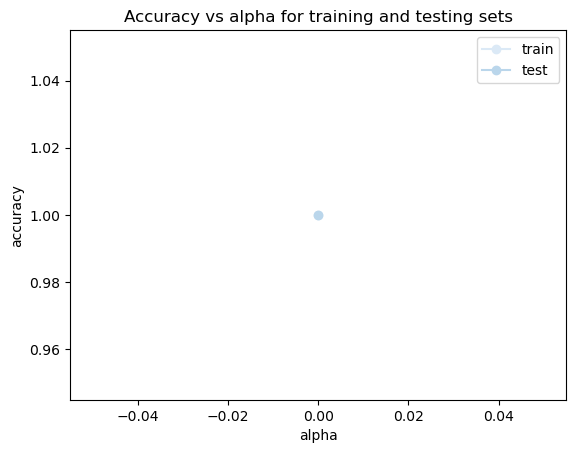

In [104]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [105]:
y_pred = pruned_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1485    0]
 [ 519    0]]
Accuracy: 0.7410
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1485
           1       0.00      0.00      0.00       519

    accuracy                           0.74      2004
   macro avg       0.37      0.50      0.43      2004
weighted avg       0.55      0.74      0.63      2004



C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [106]:
feature_importances = pruned_tree.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

               Feature  Importance
0               Tenure        0.00
59            State_RI        0.00
68            State_WI        0.00
67            State_WA        0.00
66            State_VT        0.00
..                 ...         ...
29            State_FL        0.00
28            State_DE        0.00
27            State_DC        0.00
26            State_CT        0.00
92  age_group_Under 30        0.00

[93 rows x 2 columns]


In [107]:
from sklearn import svm

SVM = svm.SVC()
SVM.fit(X_train, y_train)

SVC()

In [108]:
svm_predict = SVM.predict(X_test)
svm_predict[:5]

array([0, 1, 1, 0, 0], dtype=int64)

In [109]:
SVM_Accuracy_Score = metrics.accuracy_score(y_test,svm_predict )
SVM_JaccardIndex = jaccard_score(y_test, svm_predict)
SVM_F1_Score = f1_score(y_test, svm_predict)
print("SVM_Accuracy_Score",SVM_Accuracy_Score )
print("SVM_JaccardIndex", SVM_JaccardIndex)
print("SVM_F1_Score", SVM_F1_Score)

SVM_Accuracy_Score 1.0
SVM_JaccardIndex 1.0
SVM_F1_Score 1.0
